In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd

# Specify the file path or URL
file_path = '/agricultural_data.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


      crop  area  production  annual_rainfall  amount_of_fertilizer  \
0  Soybean  1487        2263              970                    46   
1   Barley  1978        2855              533                    32   
2    Maize  1683        2981             1152                    60   
3   Barley  1149        2506              926                    30   
4   Barley  1468        1658             1329                    41   

   amount_of_pesticide soil_type  soil_quality  yield  
0                   31      Silt           7.6    2.4  
1                   20      Peat           7.3    1.1  
2                   25      Clay           7.8    2.9  
3                   17      Loam           5.7    1.4  
4                   16      Peat           6.7    3.0  


In [ ]:
#3. Find shape of our dataset
df.shape

(2000, 9)

In [ ]:
#4. Get information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   crop                  2000 non-null   object 
 1   area                  2000 non-null   int64  
 2   production            2000 non-null   int64  
 3   annual_rainfall       2000 non-null   int64  
 4   amount_of_fertilizer  2000 non-null   int64  
 5   amount_of_pesticide   2000 non-null   int64  
 6   soil_type             2000 non-null   object 
 7   soil_quality          2000 non-null   float64
 8   yield                 2000 non-null   float64
dtypes: float64(2), int64(5), object(2)
memory usage: 140.8+ KB


In [ ]:
print(df.isnull().sum())

crop                    0
area                    0
production              0
annual_rainfall         0
amount_of_fertilizer    0
amount_of_pesticide     0
soil_type               0
soil_quality            0
yield                   0
dtype: int64


In [ ]:
df.columns

Index(['crop', 'area', 'production', 'annual_rainfall', 'amount_of_fertilizer',
       'amount_of_pesticide', 'soil_type', 'soil_quality', 'yield'],
      dtype='object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

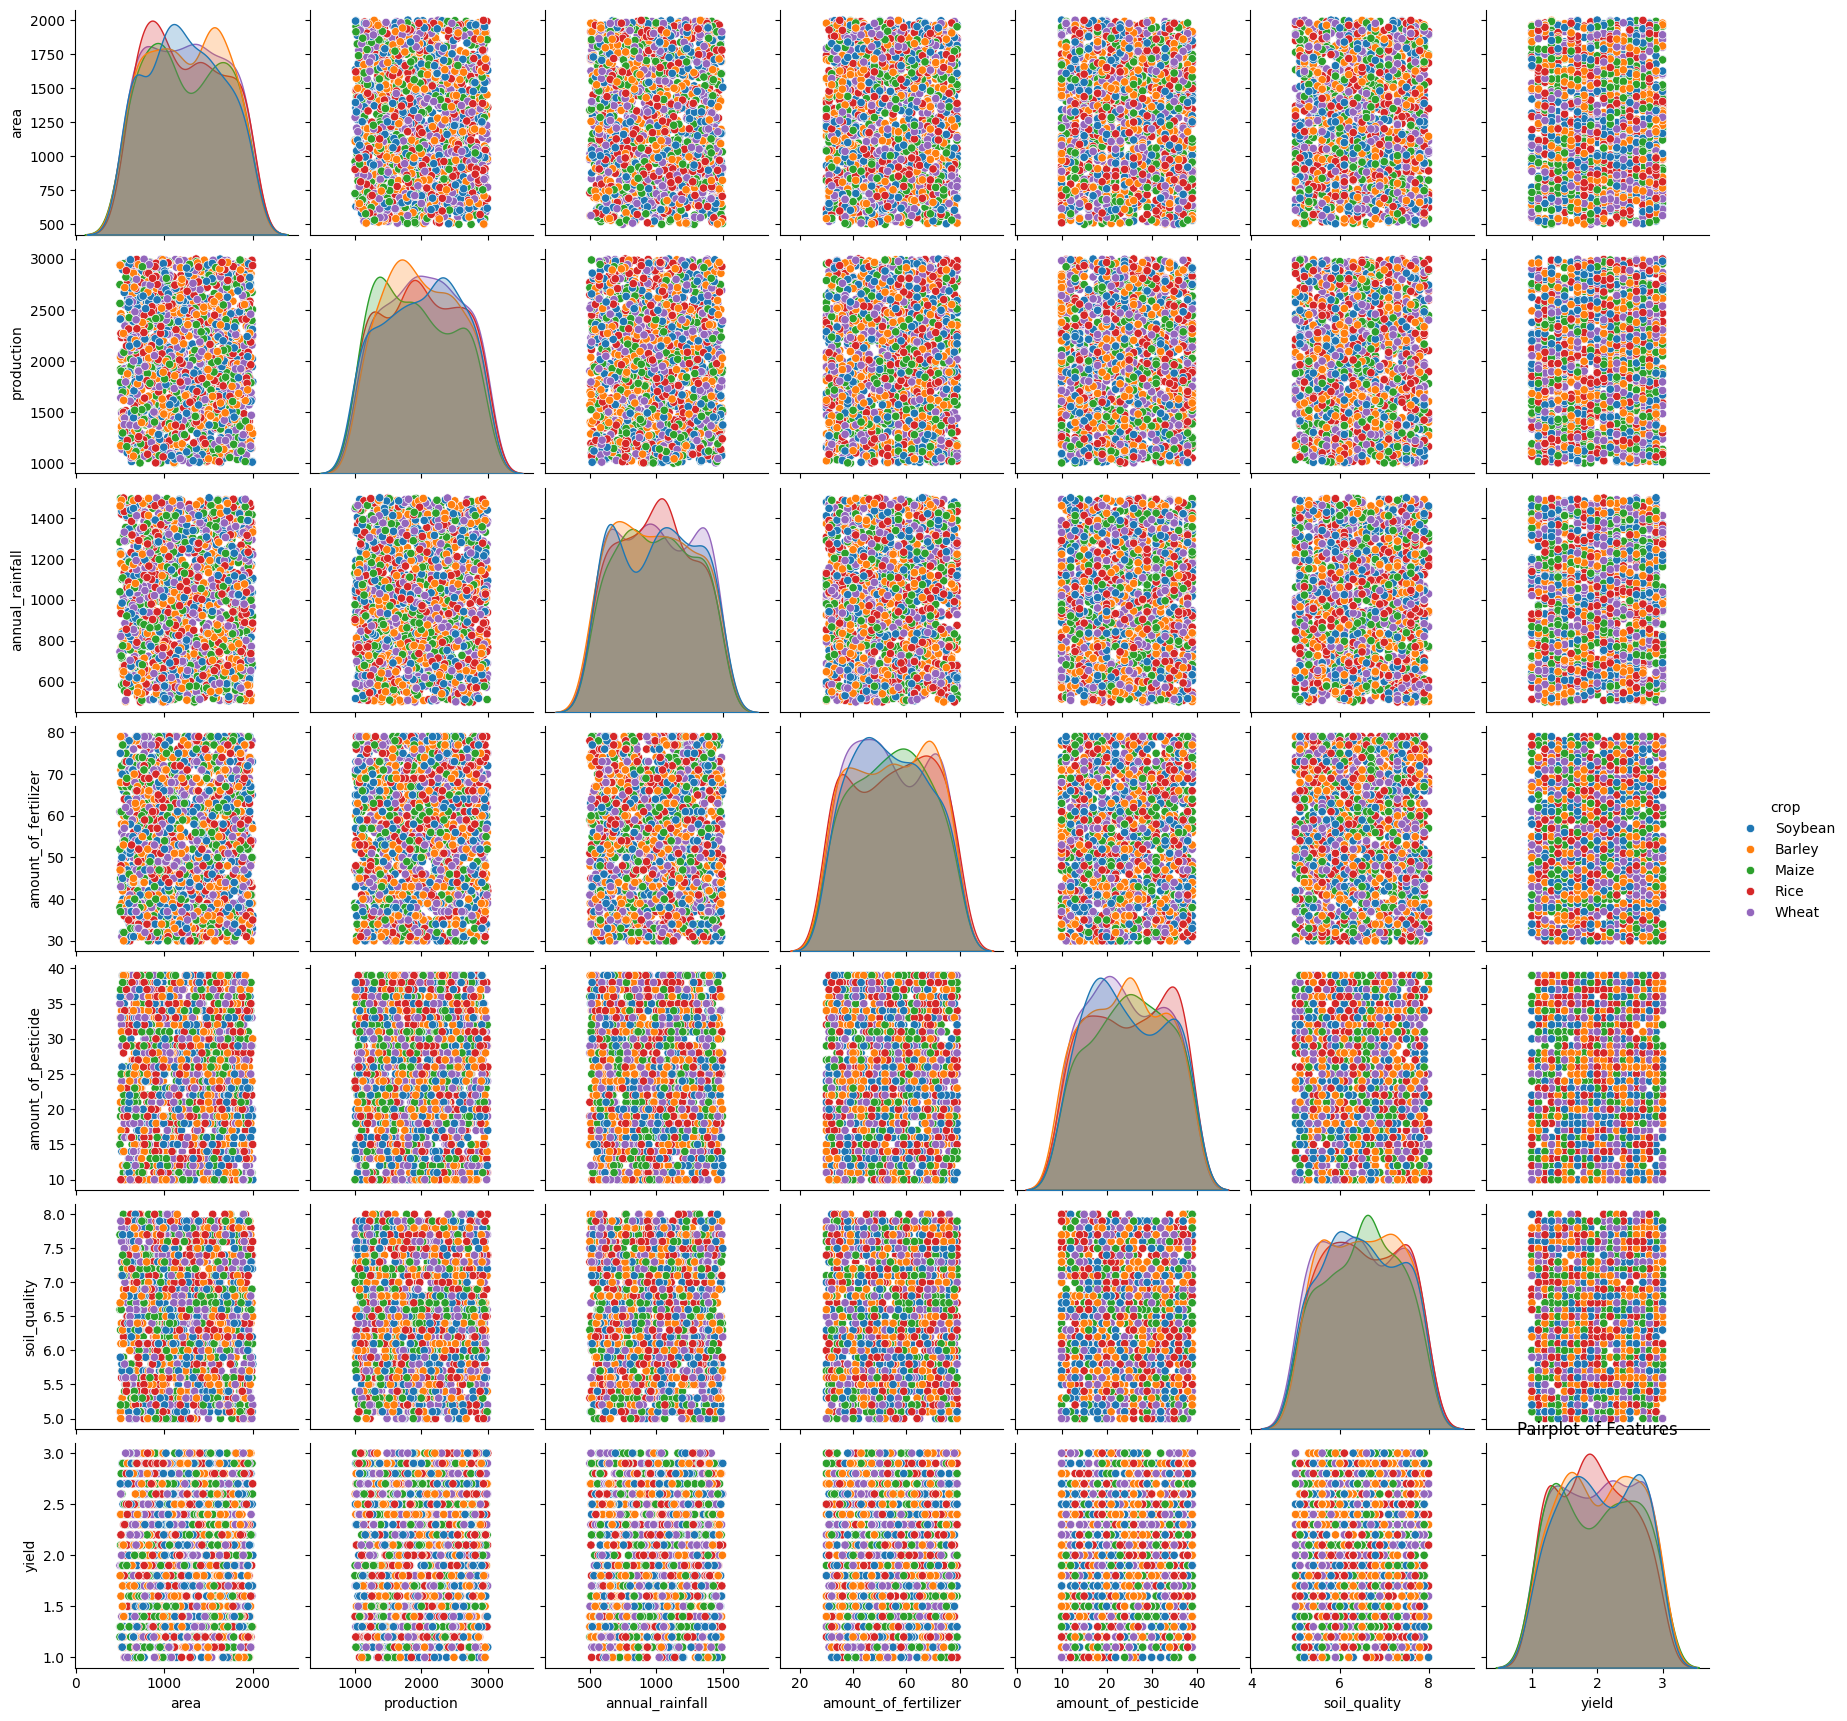

In [ ]:
# Pairplot
sns.pairplot(df, hue='crop')
plt.title('Pairplot of Features')
plt.show()

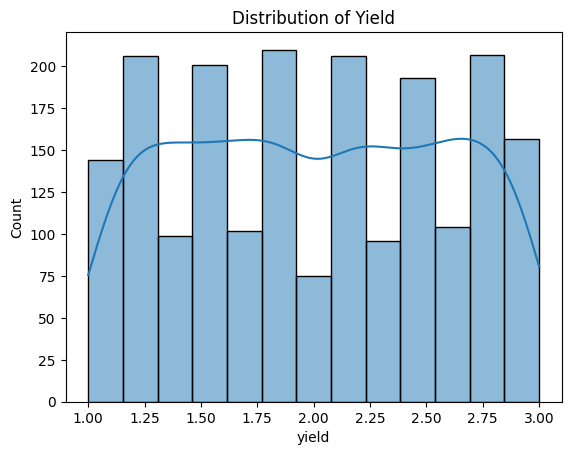

In [ ]:
# Distribution of yield
sns.histplot(df['yield'], kde=True)
plt.title('Distribution of Yield')
plt.show()

In [ ]:
# Using pandas get_dummies function
# Assuming 'df' is your DataFrame
df = pd.get_dummies(df, columns=['crop', 'soil_type'])
df

area  production  annual_rainfall  amount_of_fertilizer  \
0     1487        2263              970                    46   
1     1978        2855              533                    32   
2     1683        2981             1152                    60   
3     1149        2506              926                    30   
4     1468        1658             1329                    41   
...    ...         ...              ...                   ...   
1995   782        1949             1045                    32   
1996  1859        2891              668                    75   
1997   889        2053             1021                    53   
1998  1499        1044             1133                    63   
1999  1024        2810             1412                    75   

      amount_of_pesticide  soil_quality  yield  crop_Barley  crop_Maize  \
0                      31           7.6    2.4        False       False   
1                      20           7.3    1.1         True       False   
2                      25           7.8    2.9        False        True   
3                      17           5.7    1.4         True       False   
4                      16           6.7    3.0         True       False   
...                   ...           ...    ...          ...         ...   
1995                   33           6.9    1.6        False       False   
1996                   37           7.0    2.3         True       False   
1997                   10           5.9    1.0        False       False   
1998                   21           6.0    2.5         True       False   
1999                   13           6.0    1.5        False        True   

      crop_Rice  crop_Soybean  crop_Wheat  soil_type_Clay  soil_type_Loam  \
0         False          True       False           False           False   
1         False         False       False           False           False   
2         False         False       False            True           False   
3         False         False       False           False            True   
4         False         False       False           False           False   
...         ...           ...         ...             ...             ...   
1995      False         False        True           False           False   
1996      False         False       False           False           False   
1997      False         False        True           False            True   
1998      False         False       False           False           False   
1999      False         False       False           False           False   

      soil_type_Peat  soil_type_Sand  soil_type_Silt  
0              False           False            True  
1               True           False           False  
2              False           False           False  
3              False           False           False  
4               True           False           False  
...              ...             ...             ...  
1995           False            True           False  
1996           False            True           False  
1997           False           False           False  
1998           False           False            True  
1999            True           False           False  

[2000 rows x 17 columns]

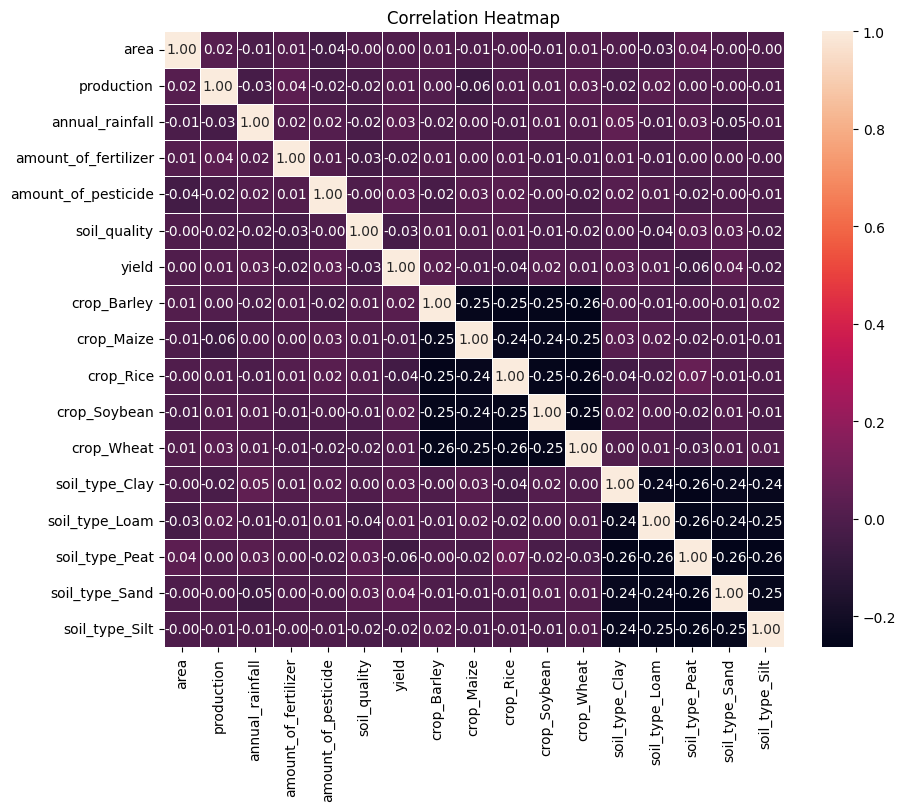

In [ ]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
X = df.drop('yield', axis=1)
y = df['yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)

# Decision Tree Regression
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_pred)

# Random Forest Regression
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Decision Tree MSE: {dt_mse}")
print(f"Random Forest MSE: {rf_mse}")

Linear Regression MSE: 0.32738634265643723
Decision Tree MSE: 0.647525
Random Forest MSE: 0.33899345499999994


In [ ]:
high_accuracy=min(lr_mse,dt_mse, rf_mse)
acc_model={rf_mse:'Random Forest', dt_mse:'Decision Tree', lr_mse:'Linear Regression'}
print('Most accurate algorithm: ', acc_model.get(high_accuracy) )

Most accurate algorithm:  Linear Regression


In [ ]:
data =[[1000, 1200, 60, 800, 20, 7.5,1,0,0,0,0,0,1,0,0,0]]
feature=['area', 'production', 'annual_rainfall', 'amount_of_fertilizer', 'amount_of_pesticide', 'soil_quality','crop_Barley','crop_Maize','crop_Rice', 'crop_Soybean', 'crop_Wheat', 'soil_type_Clay', 'soil_type_Loam','soil_type_Peat','soil_type_Sand','soil_type_Silt']

input=pd.DataFrame(data, columns=feature)
# Predict yield using models
rf_yield= rf.predict(input)
print(f"Predicted yield using Random Forest Regression : {rf_yield[0]}")

dt_yield=dt.predict(input)
print(f"Predicted yield using Decision Tree : {dt_yield[0]}")

lr_yield=lr.predict(input)
print(f"Predicted yield using Linear Regression: {lr_yield[0]}")

Predicted yield using Random Forest Regression : 1.628999999999999
Predicted yield using Decision Tree : 1.0
Predicted yield using Linear Regression: 1.029349685019752
